In [210]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [216]:
n = 300
sigma1 = [[5,3], [3,5]]
sigma2 = [[1,0], [0,1]]
mu1 = [0,0]
mu2 = [1,2]

X1 = np.random.multivariate_normal(mu1, sigma1, n)
X2 = np.random.multivariate_normal(mu2, sigma2, n)

X_data = np.concatenate((X1, X2), axis=0)
y_data = np.concatenate((np.zeros(n), np.ones(n)), axis=0)

In [217]:
import sklearn.linear_model as lm

logistic_regression = lm.LogisticRegression(solver = 'liblinear', warm_start = True).fit(X_data, y_data)
lr_params = np.hstack((logistic_regression.intercept_[:,None], logistic_regression.coef_))[0]


y_pred = logistic_regression.predict(X_data)
accuracy = accuracy_score(y_data, y_pred)
error_rate_lr = 1 - accuracy
error_rate_lr

0.21999999999999997

In [218]:
##LDA 

import sklearn.discriminant_analysis as dm

linear_discriminant_analysis = dm.LinearDiscriminantAnalysis(solver = 'lsqr').fit(X_data, y_data) #'lsqr', 'eigen'

y_pred = linear_discriminant_analysis.predict(X_data)

accuracy = accuracy_score(y_data, y_pred)
error_rate_lda = 1 - accuracy
error_rate_lda

0.2316666666666667

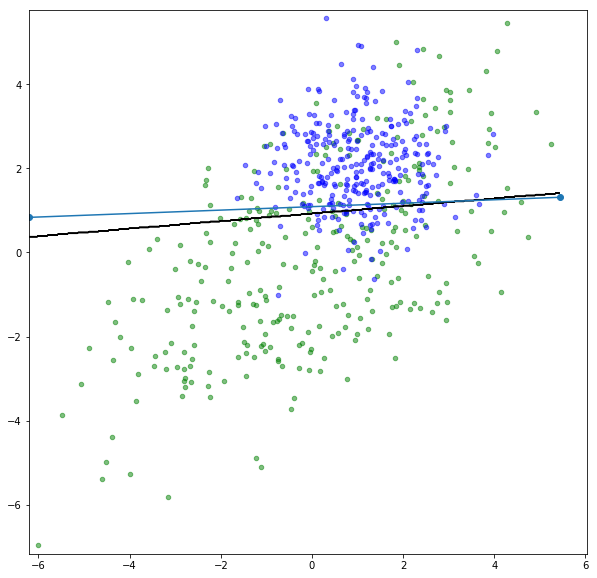

logistic regression error rate: 0.21999999999999997
LDA error rate: 0.2316666666666667


In [219]:
h = 0.02
x_min, x_max = X_data[:,0].min() - 10*h, X_data[:,0].max() + 10*h
y_min, y_max = X_data[:,1].min() - 10*h, X_data[:,1].max() + 10*h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = linear_discriminant_analysis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contour(xx, yy, Z, colors='k', linewidths=0.7)

plt.scatter(X1[:,0], X1[:,1], s=20, color ='g', alpha=0.5)
plt.scatter(X2[:,0], X2[:,1], s=20, color = 'b', alpha=0.5)

db_x = [x_min, x_max]
db_y = [-(lr_params[0]+lr_params[1]*db_x[0])/lr_params[2], -(lr_params[0]+lr_params[1]*db_x[1])/lr_params[2]] 
plt.plot(db_x, db_y, marker = 'o')
plt.contour(xx, yy, Z, colors='k', linewidths=0.7)

plt.show()
print('logistic regression error rate: ' + str(error_rate_lr))
print('LDA error rate: ' + str(error_rate_lda))